## Objective : 

* visualize individual feature patterns
* Run descriptive statistical analysis 
* use groups and pivot tables to find the effect of categorical vairables on price
* use pearson coefficient to mearsure the interdependce between variabels. 

#### Import the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
# load dataset from the github from folder EDA / Data

df = pd.read_csv('/workspaces/DataScience_tutorial/EDA/Data/laptops.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


## Visualize individual feature patterns

__a. Continous features__


In [10]:
# check the datatype

df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

#### Regression plots for each of the variables: 'cpu-frquecny', 'screen-size-inch and 'weight-pounds' against 'price'


(0.0, 3974.15)

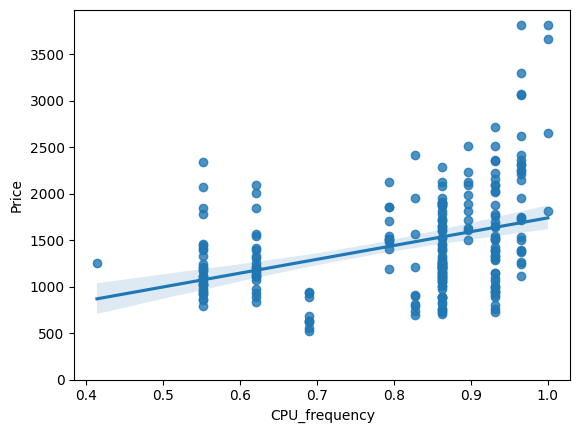

In [17]:
# CPU_frequency plot vs price
sns.regplot(x= 'CPU_frequency', y = 'Price', data = df)
plt.ylim(0,)

#### Screen_Size_inch plot vs price

(0.0, 3974.15)

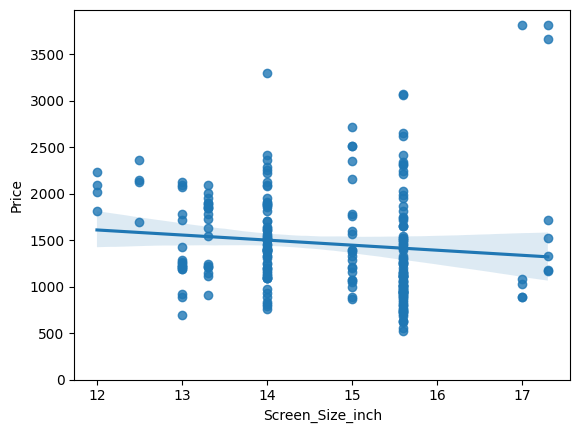

In [19]:
sns.regplot(x = 'Screen_Size_inch', y = 'Price', data = df)
plt.ylim(0, )


#### Weight_pounds plot vs price

(0.0, 3974.15)

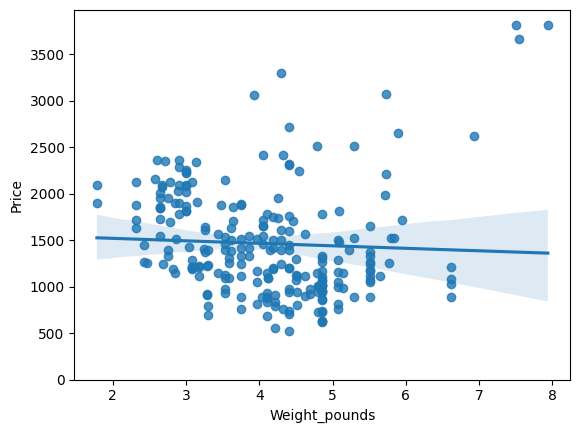

In [21]:
sns.regplot(x = 'Weight_pounds', y = 'Price', data = df)
plt.ylim(0, )

#### Correlation value of three attributes with price


In [25]:

df[['CPU_frequency','Screen_Size_inch','Weight_pounds','Price']].corr()

,CPU_frequency,Screen_Size_inch,Weight_pounds,Price
CPU_frequency,1.000000,-0.000948,0.066522,0.366666
Screen_Size_inch,-0.000948,1.000000,0.797534,-0.110644
Weight_pounds,0.066522,0.797534,1.000000,-0.050312
Price,0.366666,-0.110644,-0.050312,1.000000


In [29]:
for three in ['CPU_frequency','Screen_Size_inch','Weight_pounds','Price']:
    print(f'correlation of {three} is', df[[three,'Price']].corr())

correlation of CPU_frequency is                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
correlation of Screen_Size_inch is                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
correlation of Weight_pounds is                Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000
correlation of Price is        Price  Price
Price    1.0    1.0
Price    1.0    1.0


CPU frequency has 36% relatinship with Price, while other two attributes have weak correlation with price. 

__b. Categorical features__

These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

<Axes: xlabel='Category', ylabel='Price'>

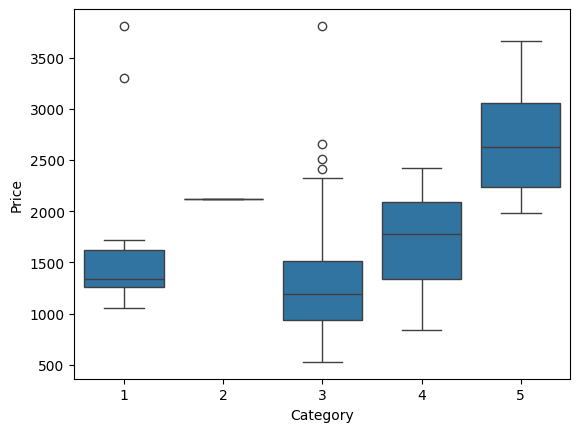

In [32]:
# boxplot foro category with price

sns.boxplot(x = 'Category', y = 'Price', data = df)

<Axes: xlabel='GPU', ylabel='Price'>

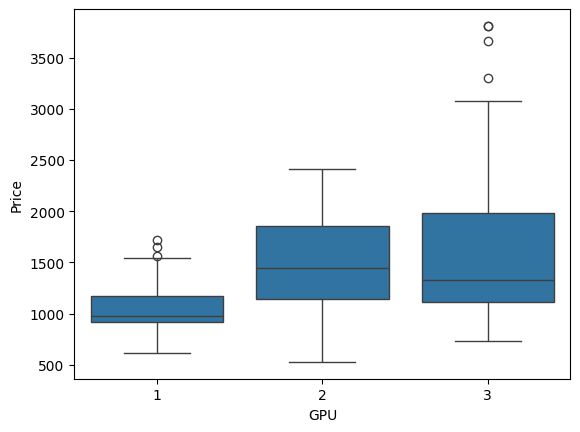

In [34]:
# GPU vs price
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

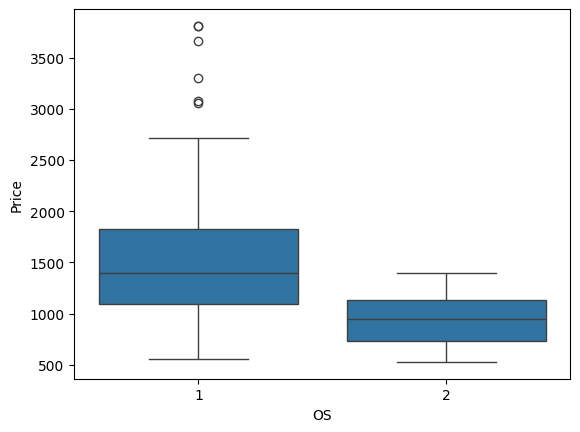

In [35]:
sns.boxplot(x="OS", y="Price", data=df)


<Axes: xlabel='CPU_core', ylabel='Price'>

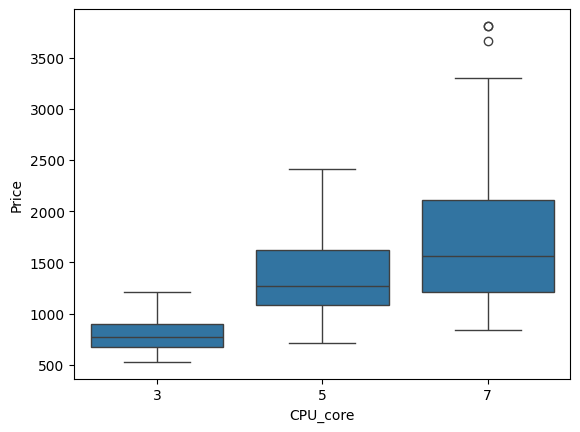

In [36]:

sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

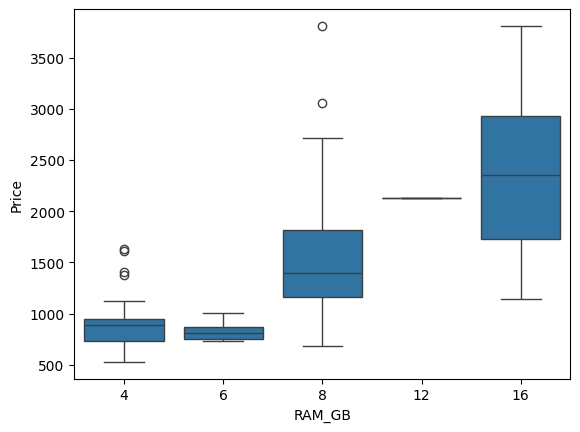

In [38]:

sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

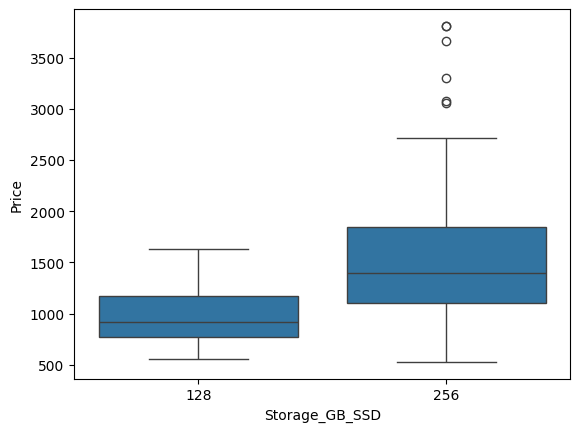

In [39]:

sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

From the boxplots you have provided, the strength of correlation between the various features (Category, GPU, OS, CPU Core, RAM, and Storage) and the price:

1. **RAM (GB)**:
   - Strongest predictor of price.
   - As RAM increases, there is a clear upward trend in price. The price range also increases significantly for higher RAM capacities (e.g., 16 GB has a noticeably higher price than 4 GB).

2. **CPU Core**:
   - Strong predictor.
   - There is a clear pattern: more CPU cores (e.g., 7) are associated with higher prices compared to fewer cores (e.g., 3).

3. **GPU**:
   - Moderate predictor.
   - There is a positive correlation between GPU type and price. GPUs in category 3 have a wider price range with higher values, compared to category 1.

4. **Category**:
   - Moderate predictor.
   - Categories 4 and 5 show higher price ranges, but there is more variability in prices across different categories.

5. **Storage (GB)**:
   - Low predictor.
   - There is an increase in price for 256 GB SSD compared to 128 GB SSD, but the difference is less pronounced than with RAM or CPU cores.

6. **OS**:
   - Lowest predictor.
   - The difference in prices for the two operating system types is smaller, with OS 1 having a wider range of prices compared to OS 2.

In summary:
- **Strong predictor**: RAM, CPU cores.
- **Moderate predictor**: GPU, Category.
- **Low predictor**: Storage, OS. 


## Descriptive Statistical analysis


In [44]:
# numerical description
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [45]:
#object decription
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


## Groupby and pivot tables

Group "GPU", "CPU_core" and "Price" to make a pivot table

In [50]:
df_group = df[['GPU','CPU_core','Price']]
grouped_test1 = df_group.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [52]:
#pivot
df_pivot =grouped_test1.pivot(index='GPU', columns='CPU_core')
df_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      238 non-null    int64  
 1   Unnamed: 0        238 non-null    int64  
 2   Manufacturer      238 non-null    object 
 3   Category          238 non-null    int64  
 4   GPU               238 non-null    int64  
 5   OS                238 non-null    int64  
 6   CPU_core          238 non-null    int64  
 7   Screen_Size_inch  238 non-null    float64
 8   CPU_frequency     238 non-null    float64
 9   RAM_GB            238 non-null    int64  
 10  Storage_GB_SSD    238 non-null    int64  
 11  Weight_pounds     238 non-null    float64
 12  Price             238 non-null    int64  
 13  Price-binned      238 non-null    object 
 14  Screen-Full_HD    238 non-null    int64  
 15  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory u

### Visualize this connectin using pcolor plot

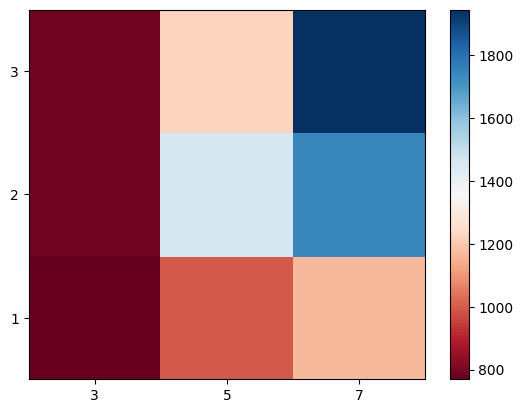

In [54]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

## Pearson Correlation and P-values

Checking the correlation coefficient value and determine on the basis of p value.

In [55]:
from scipy import stats

In [57]:
check_list =  ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']


In [67]:
for all in check_list:
    pearson_coef, p_value = stats.pearsonr(df[all], df['Price'])
    print(all)
    print("the pearson correlation coefficient for", all, "is", "with a p value = ", p_value)


RAM_GB
the pearson correlation coefficient for RAM_GB is with a p value =  3.681560628842995e-20
CPU_frequency
the pearson correlation coefficient for CPU_frequency is with a p value =  5.502463689008684e-09
Storage_GB_SSD
the pearson correlation coefficient for Storage_GB_SSD is with a p value =  0.00014898923191723927
Screen_Size_inch
the pearson correlation coefficient for Screen_Size_inch is with a p value =  0.08853397846830661
Weight_pounds
the pearson correlation coefficient for Weight_pounds is with a p value =  0.4397693853480018
CPU_core
the pearson correlation coefficient for CPU_core is with a p value =  7.912950127009183e-14
OS
the pearson correlation coefficient for OS is with a p value =  0.0005696642559246719
GPU
the pearson correlation coefficient for GPU is with a p value =  6.166949698364344e-06
Category
the pearson correlation coefficient for Category is with a p value =  7.22569623580658e-06
